In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import arviz as az
from cmdstanpy import cmdstan_path, CmdStanModel


In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
stazioni = df['Stazione'].fillna('CITTADELLA').unique().tolist()

In [4]:
dict = {}

for value in stazioni:
    dict[value] = az.from_netcdf(filename='./inference_data/'+value+'.ncdf')

In [5]:
dict

{'CITTADELLA': Inference data with groups:
 	> posterior
 	> sample_stats,
 'MONTEBELLO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'BADIA': Inference data with groups:
 	> posterior
 	> sample_stats,
 'SARAGAT': Inference data with groups:
 	> posterior
 	> sample_stats,
 'CASTELLARANO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'S. LAZZARO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'FEBBIO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'S. ROCCO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'TIMAVO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'GIARDINI': Inference data with groups:
 	> posterior
 	> sample_stats,
 'REMESINA': Inference data with groups:
 	> posterior
 	> sample_stats,
 'PARCO FERRARI': Inference data with groups:
 	> posterior
 	> sample_stats,
 'SAN FRANCESCO': Inference data with groups:
 	> posterior
 	> sample_stats,
 'GAVELLO': Inference data with groups:

array([<AxesSubplot: title={'center': 'phi'}>,
       <AxesSubplot: title={'center': 'theta'}>,
       <AxesSubplot: title={'center': 'sigma'}>], dtype=object)

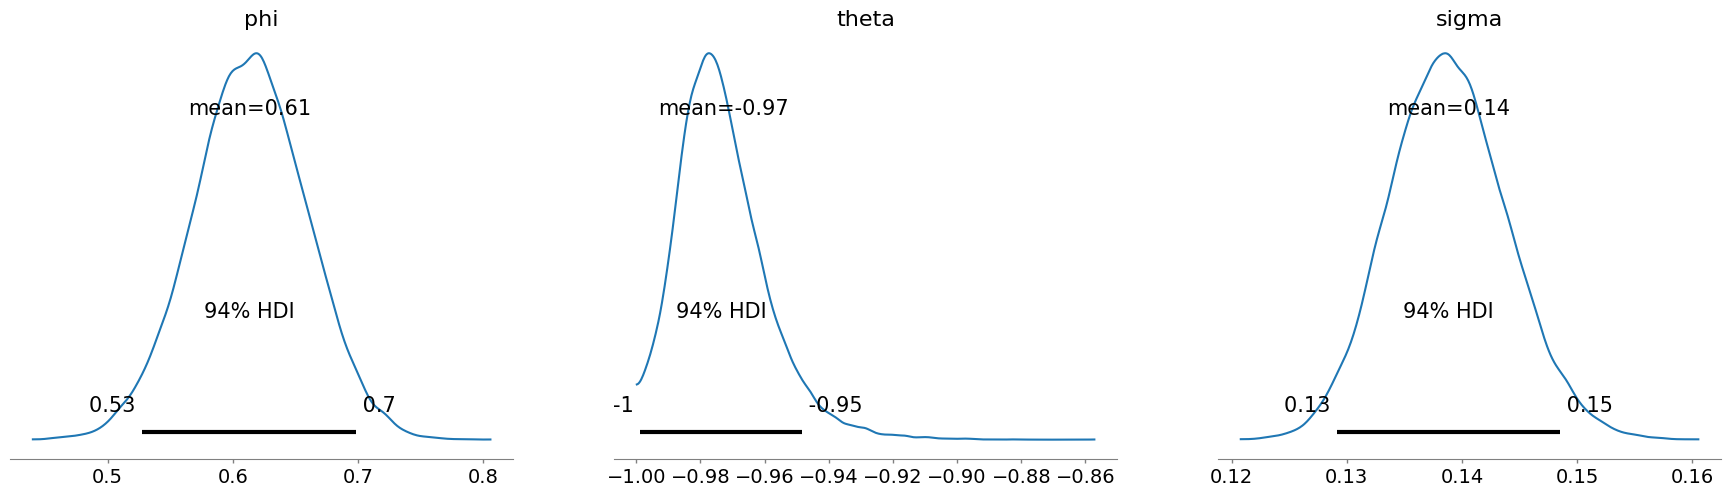

In [6]:
az.plot_posterior(dict['BESENZONE'])

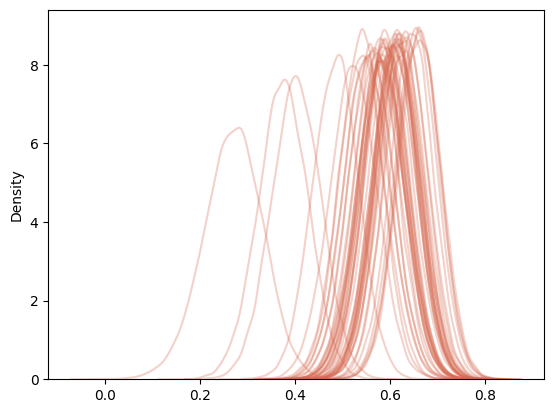

In [7]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dict:
    sns.kdeplot(dict[stazione].posterior.phi.values.flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
                

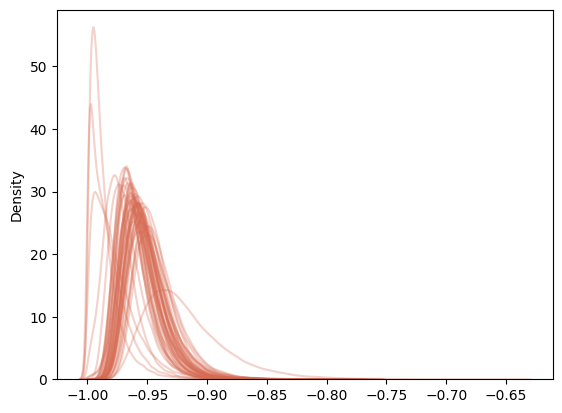

In [8]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dict:
    sns.kdeplot(dict[stazione].posterior.theta.values.flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
    
